In [1]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Mp = 1.e-3
Nout = 1000
times = np.logspace(0, 3, Nout)

def makesim(a):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=Mp, a=1., e=0.1)
    sim.add(m=Mp, a=a, e=0.1)
    sim.move_to_com()
    sim.integrator="whfast"
    sim.dt = 0.01*sim.particles[1].P
    Eerr = np.zeros(Nout)
    E0 = sim.calculate_energy()
    ps = sim.particles
    pred = np.pi**2/6.*ps[2].m/ps[0].m*(ps[1].a/ps[2].a)**3*(sim.dt/ps[1].P)**2
    print(ps[1].P)
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        E = sim.calculate_energy()
        Eerr[i] = np.abs((E-E0)/E0)
    return np.max(Eerr), pred

In [3]:
avals = np.logspace(1,3,10)
err = []
pred = []
for a in avals:
    e, p = makesim(a)
    err.append(e)
    pred.append(p)

6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708
6.280046068758708


In [4]:
err

[2.8811384587120806e-09,
 6.313041556017721e-10,
 1.3692328598942638e-10,
 2.969811194511592e-11,
 6.413835517873798e-12,
 1.364195321887809e-12,
 3.36274985802141e-13,
 6.270905982544673e-14,
 3.7883818824051484e-14,
 3.162704476469698e-14]

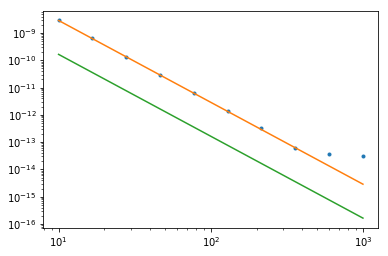

In [5]:
fig, ax = plt.subplots()
ax.plot(avals, err, '.')
ax.plot(avals, err[0]*(avals/avals[0])**(-3))
ax.plot(avals, pred)
ax.set_yscale('log')
ax.set_xscale('log')

In [6]:
Mp = 1.e-3
Nout = 1000
times = np.logspace(0, 3, Nout)

def makesim(a):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=Mp, a=1., e=0.)
    sim.add(m=Mp, a=a, e=0.)
    sim.move_to_com()
    sim.integrator="whfast"
    sim.dt = 0.01*sim.particles[1].P
    return sim

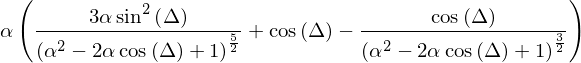

In [178]:
diff(HI, Delta, 2)

In [88]:
def Herrtidal(sim):
    return -(sim.dt/ps[1].P)**2*np.pi**2/6. * 3.*sim.G*ps[1].m*ps[2].m/ps[2].a*(ps[1].a/ps[2].a)**2*np.cos(2*(ps[1].l-ps[2].l))    
def Herrfull(sim):
    alpha = ps[1].a/ps[2].a
    dl = ps[1].l-ps[2].l
    loc = (1 + alpha**2 - 2*alpha*np.cos(dl))**0.5
    return (sim.dt/ps[1].P)**2*np.pi**2/6. * sim.G*ps[1].m*ps[2].m/ps[2].a*alpha*(3*alpha*np.sin(dl)**2/loc**5 + np.cos(dl)*(1-1/loc**3))
def Rfull(sim):
    r = np.sqrt((ps[1].x-ps[2].x)**2 + (ps[1].y-ps[2].y)**2)
    return -sim.G*ps[1].m*ps[2].m/r + sim.G*ps[1].m*ps[2].m*(ps[1].x*ps[2].x + ps[1].y*ps[2].y)/(ps[2].x**2 + ps[2].y**2)**1.5
def Rexp(sim):
    alpha = ps[1].a/ps[2].a
    dl = ps[1].l-ps[2].l
    return -sim.G*ps[1].m*ps[2].m/ps[2].a*((1+alpha**2-2*alpha*np.cos(dl))**(-1/2.) - alpha*np.cos(dl))

sim = makesim(100)
times = np.linspace(0, 50, Nout)
Eerr, aratio = np.zeros(Nout), np.zeros(Nout)
Herrfulls, Herrtidals = np.zeros(Nout), np.zeros(Nout)
E, L1 = np.zeros(Nout), np.zeros(Nout)
Rfulls, Rexps = np.zeros(Nout), np.zeros(Nout)
ps = sim.particles

E0 = sim.calculate_energy()# + Herr(sim)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E[i] = sim.calculate_energy()# + Herr(sim)
    Herrfulls[i] = Herrfull(sim)
    Herrtidals[i] = Herrtidal(sim)
    Eerr[i] = np.abs((E[i]-E0)/E0)
    Rfulls[i] = Rfull(sim)
    Rexps[i] = Rexp(sim)
    L1[i] = ps[1].m*np.sqrt(sim.G*ps[0].m*ps[1].a)
    d2 = (ps[1].x-ps[2].x)**2 + (ps[1].y-ps[2].y)**2
    aratio[i] = ps[2].m/ps[0].m*ps[1].d**2/d2

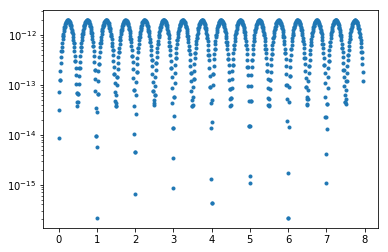

In [94]:
fig, ax = plt.subplots()
P = sim.particles[1].P
amp = np.pi**2/6*(sim.dt/P)**2*ps[2].m/ps[0].m*(ps[1].a/ps[2].a)**3
ax.plot(times/2/np.pi, np.abs(Eerr), '.')
#ax.plot(times, np.abs(Herrs), '.')
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
ax.set_yscale('log')

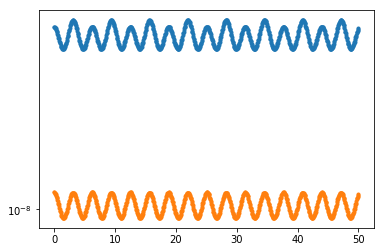

In [90]:
fig, ax = plt.subplots()
ax.plot(times, -Rfulls, '.')
ax.plot(times, -Rexps, '.')
#ax.plot(times, np.abs(Herrs), '.')
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
ax.set_yscale('log')

In [91]:
(ps[1].a/ps[2].a)**3

9.99999999435665e-07

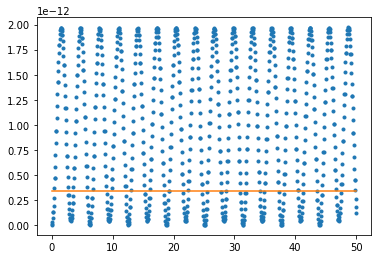

In [93]:
fig, ax = plt.subplots()
P = sim.particles[1].P
ax.plot(times, Eerr, '.')
ax.plot(times, [np.pi**2/6.*(sim.dt/ps[1].P)**2*ps[2].m/ps[0].m*(ps[1].a**2/(ps[2].a-ps[1].a)**2 - (ps[1].a/ps[2].a)**2)]*len(times))
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
#ax.set_yscale('log')
#ax.set_ylim([1e-18, 1e-14])

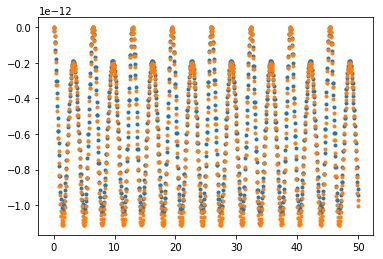

In [71]:
fig, ax = plt.subplots()
P = sim.particles[1].P
ax.plot(times, E-E[0], '.')
ax.plot(times, -(Herrfulls-Herrfulls[0]), '.')
#ax.plot(times, [np.pi**2/6.*(sim.dt/ps[1].P)**2*ps[2].m/ps[0].m*(ps[1].a/ps[2].a)**3]*len(times))
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
#ax.set_yscale('log')
#ax.set_ylim([1e-18, 1e-14])

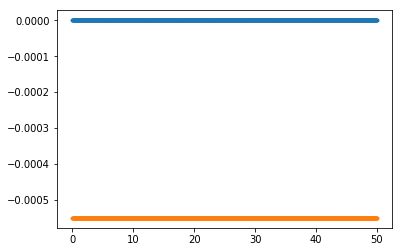

In [70]:
fig, ax = plt.subplots()
P = sim.particles[1].P
ax.plot(times, E-E[0], '.')
ax.plot(times, -(Herrtidals-Herrtidals[0]), '.')
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
#ax.set_yscale('log')
#ax.set_ylim([1e-18, 1e-14])

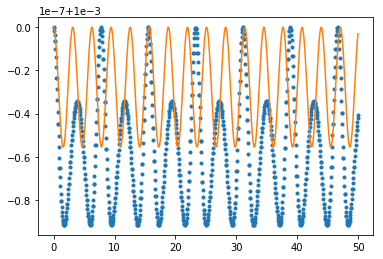

In [258]:
fig, ax = plt.subplots()
ax.plot(times, L1, '.')
ax.plot(times, L1[0]*(1-1.5*ps[2].m/ps[0].m*(ps[1].a/ps[2].a)**3*np.sin(ps[1].n*times)**2))
#ax.plot(times, np.abs(12*amp*np.sin((ps[1].n-ps[2].n)*times)))
#ax.set_yscale('log')

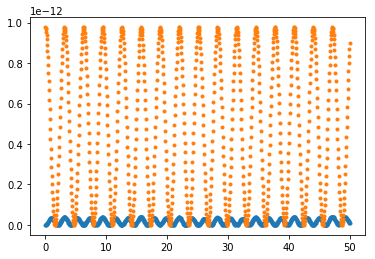

In [187]:
fig, ax = plt.subplots()
P = sim.particles[1].P
amp = sim.dt**2/24.*ps[1].n**2 * 3.*(ps[1].a/ps[2].a)**2*sim.G*ps[1].m*ps[2].m/ps[2].a
Eerr = np.abs(amp*np.cos((ps[1].n-ps[2].n)*times)**2)
ax.plot(times, np.abs((E-E[0])/E[0]), '.')
ax.plot(times, np.abs((Eerr/E[0])), '.')
#ax.set_yscale('log')

In [27]:
from celmech.disturbing_function import laplace_coefficient

In [171]:
alpha = 0.1
dl = 0.7
s=laplace_coefficient(0.5, 0, 0, alpha)
for j in range(1,10):
    l = laplace_coefficient(0.5, j, 0, alpha)*np.cos(j*dl)
    s += 2*l
    print(j, l)
s/2

1 0.07677284032152483
2 0.0012801001650313293
3 -0.000316918643659697
4 -5.17612658620957e-05
5 -4.6303961841703005e-06
6 -2.2222613450047225e-07
7 7.85073721841123e-09
8 3.0606098643542325e-09
9 3.726631598614628e-10


In [172]:
(1 + alpha**2 - 2*alpha*np.cos(dl))**(-0.5)

In [44]:
from sympy import *
init_printing()
alpha, Delta = S('alpha, Delta')

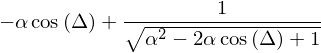

In [46]:
HI = (1+alpha**2-2*alpha*cos(Delta))**(-1/S(2)) - alpha*cos(Delta)
HI

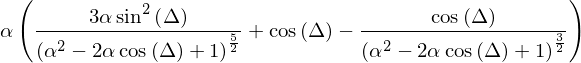

In [178]:
diff(HI, Delta, 2)

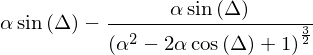

In [177]:
diff(HI, Delta, 1)

(7e-06, 1.5e-05)

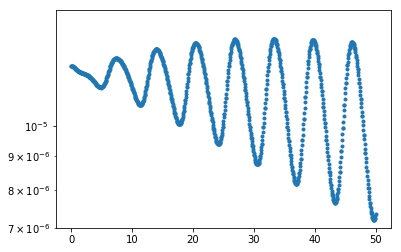

In [115]:
fig, ax = plt.subplots()
ax.plot(times, aratio, '.')
ax.set_yscale('log')
ax.set_ylim([7e-6, 1.5e-5])

In [95]:
sim.particles[2].P

198.49320659911973

In [149]:
Mp = 1.e-8
Nout = 1000
J2 = 1.e-4
times = np.logspace(0, 3, Nout)

def makesim(e=0.1):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=Mp, P=1., e=e)
    #sim.add(m=Mp, P=2.3, e=e)
    sim.move_to_com()
    sim.integrator="whfast"
    sim.dt = 0.01*sim.particles[1].P

    if J2:
        rebx = reboundx.Extras(sim)
        gh = rebx.add("gravitational_harmonics")
        ps = sim.particles
        ps[0].params['J2'] = J2
        ps[0].params['R_eq'] = ps[1].a

    Eerr = np.zeros(Nout)
    E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    ps = sim.particles
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
        Eerr[i] = np.abs((E-E0)/E0)
    return np.max(Eerr)

In [155]:
es = np.logspace(-4, -0.5, 10)
err = np.zeros(10)
for i, e in enumerate(es):
    err[i] = makesim(e)

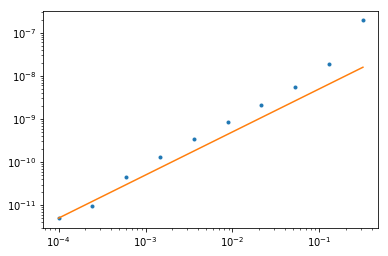

In [158]:
fig, ax = plt.subplots()
ax.plot(es, err, '.')
ax.plot(es, err[0]*(es/es[0]))
#ax.plot(avals, pred)
ax.set_yscale('log')
ax.set_xscale('log')

In [72]:
%%time

sim = makesim()
E0 = sim.calculate_energy()
Es = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy()
    Es[i] = np.abs((E-E0)/E0)
    
sim, rebx, gh = makesim(J2=J2)
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2 = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
    
sim, rebx, gh = makesim(J2=J2)
sim.integrator="ias15"
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2IAS15 = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15[i] = np.abs((E-E0)/E0)
    
sim, rebx, gh = makesim(J2=J2)
sim.integrator="ias15"
gh.force_as_operator=1
gh.operator_order=2
sim.ri_ias15.epsilon=0

E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2IAS15Split = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15Split[i] = np.abs((E-E0)/E0)

TypeError: makesim() missing 1 required positional argument: 'a'

In [3]:
try:
    plt.style.use('paper')
except:
    print("style not found")

NameError: name 'times' is not defined

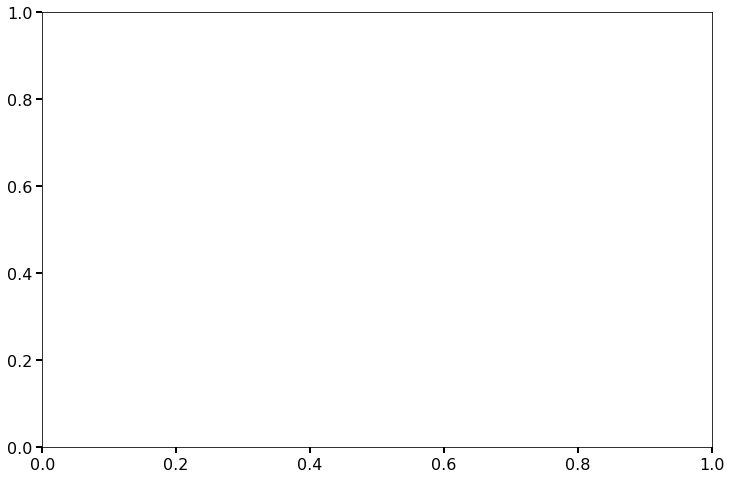

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, Es, '.', label='WH')
ax.plot(times, EsJ2, '.', label='WH J2')
ax.plot(times, EsJ2IAS15, '.', label='IAS15 J2')
ax.plot(times, EsJ2IAS15Split, '.', label='IAS15 J2 Split')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.])

plt.rcParams["text.usetex"] =True
plt.locator_params(axis='y', numticks=5)
ax.annotate(s='', xy=(60, 2.e-8), xytext=(60, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(4, 1.e-4, r'$\epsilon_{p}(\Delta t/T)^2$', fontsize=24)

ax.annotate(s='', xy=(3, 5.e-12), xytext=(3, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(80, 1.e-4, r'$\epsilon_{J2}(\Delta t/T)^2$', fontsize=24)

ax.legend(fontsize=24)
ax.set_xlabel('Time (Inner Planet Orbits)', fontsize=24)
ax.set_ylabel('Relative Hamiltonian Error', fontsize=24)

fig.savefig("fig1.pdf", bbox_inches='tight')

In [126]:
simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

rebxIAS = reboundx.Extras(simIAS)
rebxIAS.add("gravitational_harmonics")
ps = simIAS.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a

EsJ2 = np.zeros(Nout)
a = np.zeros(Nout)
times = np.logspace(0, 4, Nout)
a0 = sim.particles[1].a

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)
    a[i] = np.abs((sim.particles[1].a-a0)/a0)

In [108]:
Mp = 1.e-6
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1., e=0.1)
sim.add(m=Mp, P=2.3, e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 0.01*sim.particles[1].P

simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

E0 = sim.calculate_energy()
Es = np.zeros(Nout)
phaseerr = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy()
    Es[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)

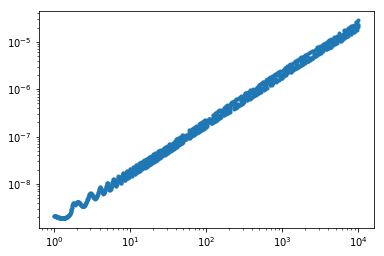

In [109]:
fig, ax = plt.subplots()
ax.plot(times, phaseerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

(1e-16, 1e-06)

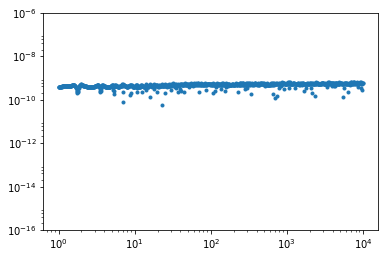

In [110]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.e-6])

In [126]:
Mp = 1.e-7
Nout = 1000
J2 = 1.e-3

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1., e=0.1)
sim.add(m=Mp, P=2.3, e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 0.01*sim.particles[1].P

simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
ps = sim.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

rebxIAS = reboundx.Extras(simIAS)
rebxIAS.add("gravitational_harmonics")
ps = simIAS.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a

EsJ2 = np.zeros(Nout)
a = np.zeros(Nout)
times = np.logspace(0, 4, Nout)
a0 = sim.particles[1].a

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)
    a[i] = np.abs((sim.particles[1].a-a0)/a0)

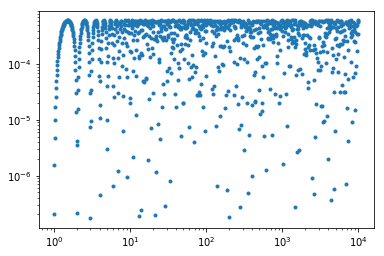

In [127]:
fig, ax = plt.subplots()
ax.plot(times, a, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

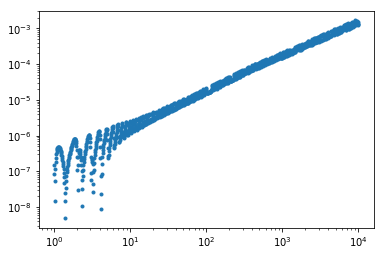

In [128]:
fig, ax = plt.subplots()
ax.plot(times, phaseerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

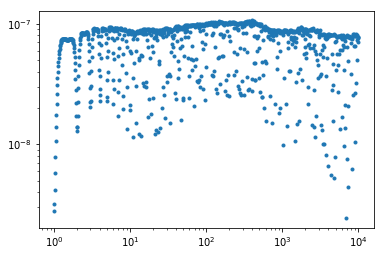

In [129]:
fig, ax = plt.subplots()
ax.plot(times, EsJ2, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

In [61]:
Mp = 1.e-7
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1.)
sim.add(m=Mp, P=2.3)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = sim.particles[1].P/100

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
#gr = rebx.add('gr_potential')
#gr.params['c'] = 1.e2
ps = sim.particles
ps[0].params['J2'] = 1.e-1
ps[0].params['R_eq'] = ps[1].a
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
#E0 = sim.calculate_energy() + rebx.gr_potential_hamiltonian(sim, gr)


EsJ2 = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    #E = sim.calculate_energy() + rebx.gr_potential_hamiltonian(sim, gr)

    EsJ2[i] = np.abs((E-E0)/E0)

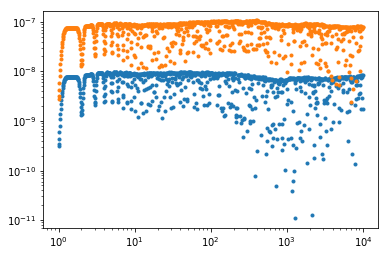

In [130]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.plot(times, EsJ2, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-6])

In [24]:
Mp = 1.e-7
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1.)
sim.add(m=Mp, P=2.3)
sim.move_to_com()

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
ps = sim.particles
ps[0].params['J2'] = 1.e-4
ps[0].params['R_eq'] = 1.
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

EsJ2IAS15 = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15[i] = np.abs((E-E0)/E0)

(1e-16, 1e-06)

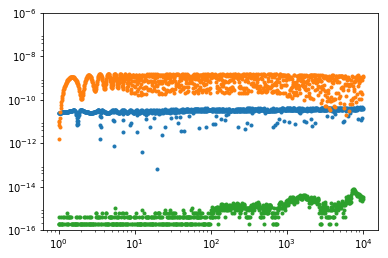

In [25]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.plot(times, EsJ2, '.')
ax.plot(times, EsJ2IAS15, '.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.e-6])

In [14]:
ps[1].a

0.293687029488642